# Project  


Content: 
1. [Read the data](#read_the_data)
2. [Descriptive statistics](#descriptive_statistics)
3. TODO...

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
import gzip
sns.set()

<a id='#read_the_data'></a>
# Read the data


TODO: explain what you did with hdf5 files, and why decided to save to csv


In [2]:
# read the data from previosly created csv files

reviews_df = pd.read_csv('reviews_cellphones.csv')

In [3]:
metadata_df = pd.read_csv('metadata_cellphones.csv')

In [4]:
cols = metadata_df.columns[1:-1]
metadata_df = metadata_df[cols].copy()

In [5]:
ratings_cols = ['reviewerID', 'asin', 'overall', 'unixReviewTime']
ratings_df = pd.DataFrame(pd.read_csv('data/ratings_Cell_Phones_and_Accessories.csv', header=None))
ratings_df.columns = ratings_cols

In [6]:
cols = reviews_df.columns[1:-1]
reviews_df = reviews_df[cols].copy()

In [7]:
reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
0,A1EWN6KZ4HMLT7,011040047X,S. Prescott,"[2, 2]","The case pictured is a soft violet color, but ...",1.0,Wrong color,1344902400
1,A1YX2RBMS1L9L,0110400550,Andrea Busch,"[0, 0]",Saw this same case at a theme park store for 2...,5.0,Great product,1353542400
2,A180NNPPKWCCU0,0110400550,Aniya pennington,"[3, 3]",case fits perfectly and I always gets complime...,5.0,Perfect,1374105600
3,A3HVRXV0LVJN7,0110400550,BiancaNicole,"[4, 4]",Best phone case ever . Everywhere I go I get a...,5.0,A++++,1358035200
4,A292527VPX98P8,0110400550,Cebell,"[0, 1]",It may look cute. This case started off pretty...,1.0,Do NOT GET IT!!,1353888000


In [8]:
metadata_df.head()

,asin,related,title,price,salesRank,imUrl,brand,categories
0,0110400550,"{'also_bought': ['B00C56IXFG', 'B008ZUQWOK', '...",Pink &amp; White 3d Melt Ice-cream Skin Hard C...,3.33,{'Cell Phones & Accessories': 83460},http://ecx.images-amazon.com/images/I/31zn6SOL...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic..."
1,011040047X,"{'buy_after_viewing': ['B008RU7UL2', 'B00698LY...",Purple Hard Case Cover for Iphone 4 4s 4g with...,1.94,{'Cell Phones & Accessories': 495795},http://ecx.images-amazon.com/images/I/41WCZc2d...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic..."
2,0195866479,"{'buy_after_viewing': ['B00530RXP2', 'B004SH9B...",Hello Kitty Light-weighted Chrome Case Black C...,2.94,{'Cell Phones & Accessories': 371302},http://ecx.images-amazon.com/images/I/41fy1%2B...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic..."
3,0214514706,"{'buy_after_viewing': ['B0042FV2SI', 'B00869D2...",Cool Summer Breeze in the Ocean Beach Collecti...,0.94,{'Cell Phones & Accessories': 778100},http://ecx.images-amazon.com/images/I/415cmp6Q...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic..."
4,0214714705,"{'buy_after_viewing': ['B008EU7HRM', 'B00869D2...",Cool Summer Breeze In The Ocean Beach Collecti...,5.79,{'Cell Phones & Accessories': 654894},http://ecx.images-amazon.com/images/I/41XDwPt2...,NaN,"[['Cell Phones & Accessories', 'Cases', 'Basic..."


In [9]:
ratings_df.head()

,reviewerID,asin,overall,unixReviewTime
0,A1EWN6KZ4HMLT7,011040047X,1.0,1344902400
1,A1YX2RBMS1L9L,0110400550,5.0,1353542400
2,A180NNPPKWCCU0,0110400550,5.0,1374105600
3,A3HVRXV0LVJN7,0110400550,5.0,1358035200
4,A292527VPX98P8,0110400550,1.0,1353888000


<a id='#descriptive_statistics'></a>

# Descriptive statistics

TODO:
 - basic histograms and charts
 - Sort by timestamps, and check again the stats?
 - Check how many people gave the comments
 

## Reviews df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5a37224e0>]], dtype=object)

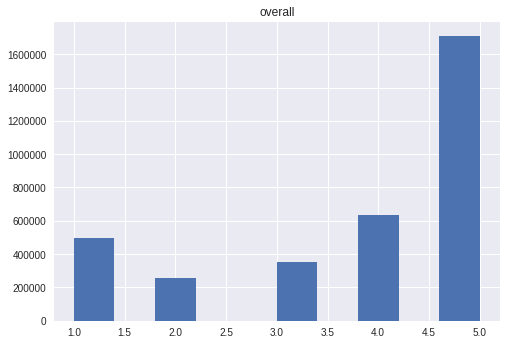

In [10]:
reviews_df.hist('overall')

In [11]:
print ("Shape: ", reviews_df.shape)
print ("Ratings values: ", reviews_df.overall.unique())
print ("Min review unix time: ", reviews_df.unixReviewTime.min())
print ("Max review unix time: ", reviews_df.unixReviewTime.max())
unique_reviewers = reviews_df['reviewerID'].unique()
unique_reviewers_percent = len(unique_reviewers) / reviews_df.shape[0] *100
unique_products = reviews_df['asin'].unique()
unique_products_percent = len(unique_products) / reviews_df.shape[0] *100
print ("Percentage of unique reviewers: ", unique_reviewers_percent )
print ("Percentage of unique products: ", unique_products_percent)


#print ("Distribution of time per months eg? Or few months: ")


Shape:  (3447249, 8)
Ratings values:  [ 1.  5.  2.  3.  4.]
Min review unix time:  942796800
Max review unix time:  1406073600
Percentage of unique reviewers:  65.5898369975595
Percentage of unique products:  9.273423532793831


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5f897c7f0>]], dtype=object)

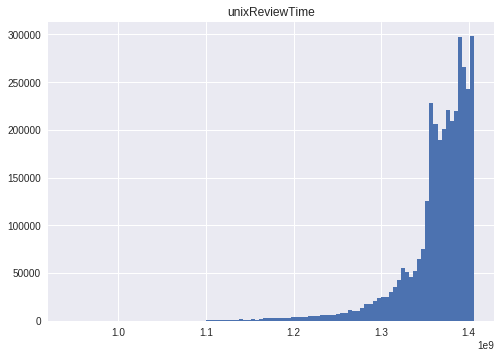

In [12]:
reviews_df.hist(column='unixReviewTime', bins=100)

## Metadata df

In [13]:
null_price = metadata_df.price.isnull().sum()
null_price_percent = null_price / metadata_df.shape[0] *100
null_brand = metadata_df.brand.isnull().sum()
null_brand_percent = null_brand / metadata_df.shape[0] *100
print ("Shape: ", metadata_df.shape)
print ("Percentage of null prices: ", null_price_percent)
print ("Percentage of null brands: ", null_brand_percent)

Shape:  (346793, 8)
Percentage of null prices:  18.4098294948
Percentage of null brands:  77.3873751777


We conclude that we need to deterimine the exact brand, as most of the brands are unknown. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5ef833470>]], dtype=object)

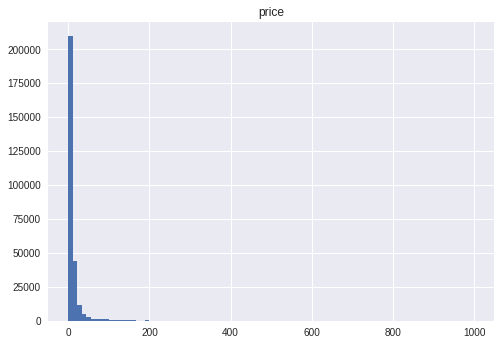

In [14]:
metadata_df.hist(column='price', bins=90)

In [15]:
# ^ something is not fine with the prices, seems like too much of the prices are 0
# but when we count, around 18% of the prices is null
# TODO: determine the brands
# TODO: find the average price per brand
# TODO: check if you have metadata for each phone from the reviews list

In [16]:
#metadata_df.categories[346768].split('[[')[1].split(",")[1].replace('\'', '')

## Phones df


Creating new meta dataframe that only contains information about phones.

In [17]:
phones_df = metadata_df[metadata_df.categories.str.
            startswith("[['Cell Phones & Accessories', 'Cell Phones', 'Unlocked ")]
phones_df = phones_df[(pd.notnull(phones_df['brand'])) & (phones_df['brand'] != '')]
phones_df.head()

,asin,related,title,price,salesRank,imUrl,brand,categories
2861,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ..."
3702,B0009FCAJA,"{'also_bought': ['B000IN5ZHM', 'B0016JDE34', '...","Motorola RAZR V3 Unlocked Phone with Camera, a...",69.99,{'Cell Phones & Accessories': 10173},http://ecx.images-amazon.com/images/I/41294T68...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ..."
5456,B000GGO5KO,"{'also_viewed': ['B000PEOLAG', 'B00A6D9WLY', '...",Sony Ericsson M600i Unlocked Cell Phone with 3...,120.00,{'Cell Phones & Accessories': 1178113},http://ecx.images-amazon.com/images/I/21I6mmuz...,Sony Ericsson,"[['Cell Phones & Accessories', 'Cell Phones', ..."
6575,B000J0YH9Q,"{'also_viewed': ['B0014TAFPG'], 'buy_after_vie...",Motorola RIZR Z3 Unlocked GSM Quadband Cell Ph...,99.99,{'Cell Phones & Accessories': 697207},http://ecx.images-amazon.com/images/I/51opABnP...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ..."
6654,B000J6EXTY,"{'also_bought': ['B000IN5ZHM', 'B0009H2M1Y', '...",Motorola RAZR V3i Dolce &amp; Gabbana Unlocked...,69.95,{'Cell Phones & Accessories': 16025},http://ecx.images-amazon.com/images/I/41VTMFSG...,Motorola,"[['Cell Phones & Accessories', 'Cell Phones', ..."


In [24]:
# TODO: process brand names 
#phones_df.groupby('brand')['price'].mean()
#phones_df.brand.unique()

In [26]:
phones_df['brand'] = phones_df['brand'].str.lower()

In [27]:
phones_df['brand'].unique()

array(['motorola', 'sony ericsson', 'nokia', 'global star', 'sony',
       'blackberry', 'lg', 'htc', 'apple', 'pharos', 'panasonic',
       't mobile', 'palm', 'cricket', 'telular', 't-mobile', 'curve 8350i',
       'samsung', 'inmarsat', 'vip-top sales watch phone', 'dell', 'droid',
       'bolo brands', 'unlocked-cell-phones', 'huawei', 'pantech', 'hp',
       'at&amp;t', 'verizon', 'victor', 'cellularfactory', 'sharp',
       'unknown', 'casio', 'generic', 's lll', 'ulefone', 'phone merchant',
       'greatcall', 'novatel wireless', 'star', 'unnecto', 'alcatel',
       'jeg &amp; sons, inc.', 'svp', 'android', 'gray', 'fujimoto dengyo',
       'newcay', 'flylink', 'ebest', 'px phone', 'digital family',
       'huawei honor', 'albanese', 'jiayu g3t', 'kyocera', 'weikin',
       'lenovo', 'zte', 'blu', 'fusion 2', 'etree', 'caterpillar',
       'indigi', 'huhushop(tm)', 'zopo', 'toto', 'tomtop',
       'samsung galaxy s4 - google edition', 'samsung galaxy mega',
       'jiayu', 'ct-m

In [28]:
# TODO: some regex for this? 
# replace: sasmsung, huawei honor, huawei ascend, sony vs sony ericsson, t-mobile vs t mobile, samsung galaxy mega vs
# samsung galaxy s4 - google edition, lumia, unassigned?,  original lenovo s750 waterproof...

# What to do with all this stupid brand names? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5bf3540f0>]], dtype=object)

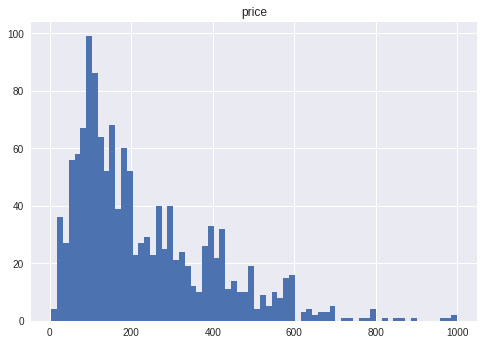

In [32]:
phones_df.hist(column='price', bins=70)

We can see that the prices for almost all phones are known, and most of them are in range 50-300 euros. 

122


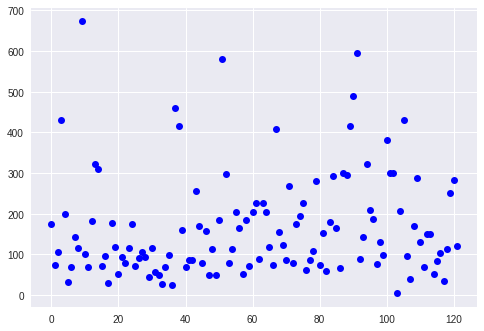

In [53]:
# TODO: show this nicer!

avg_prices = phones_df.groupby('brand')['price'].mean()
d = [i for i in range(0, len(avg_prices))]
print(len(d))
plt.plot(d, avg_prices, 'bo')

#sns.barplot(x=avg_prices[0:20], y=phones_df.brand[0:20], palette="Greens_r")

## Merged dataframes for reviews and phones metadata


We will now merge these two dataframes and check statistics for new dataframe. 

In [55]:
final_df = pd.merge(phones_df, reviews_df, on='asin', how='inner')

In [56]:
final_df.head()

,asin,related,title,price,salesRank,imUrl,brand,categories,reviewerID,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
0,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",A1LZEEL11U755M,A. Le,"[2, 2]","I didn't buy from this seller, but I owned thi...",5.0,sturdiest phone ever!,1240012800
1,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",A21BFCRY0I0RD7,"Jose Carlos P. Reyes ""otomed""","[4, 4]",I've been using a Motorola V190 for well over ...,5.0,Good phone for day to day use,1261958400
2,B0002Z8CSA,"{'also_viewed': ['B007N0RAXK', 'B00BNFLGM2', '...",Motorola V400 Unlocked Cell Phone--U.S. Versio...,81.95,{'Cell Phones & Accessories': 602817},http://ecx.images-amazon.com/images/I/4142320E...,motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",A2ND5GHEMRZV0D,Leonila Romualdo,"[1, 5]",order took 2 weeks because the package came ba...,2.0,motorola from freehasslecell.com,1235433600
3,B0009FCAJA,"{'also_bought': ['B000IN5ZHM', 'B0016JDE34', '...","Motorola RAZR V3 Unlocked Phone with Camera, a...",69.99,{'Cell Phones & Accessories': 10173},http://ecx.images-amazon.com/images/I/41294T68...,motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",A36EJJUDZ37UHS,NaN,"[4, 4]",I've ordered 3 of these phones from 2 differen...,1.0,phone is nothing but problems - not authentic ...,1200096000
4,B0009FCAJA,"{'also_bought': ['B000IN5ZHM', 'B0016JDE34', '...","Motorola RAZR V3 Unlocked Phone with Camera, a...",69.99,{'Cell Phones & Accessories': 10173},http://ecx.images-amazon.com/images/I/41294T68...,motorola,"[['Cell Phones & Accessories', 'Cell Phones', ...",A2T8YGL2PJJ93A,4004CII,"[8, 9]","I read the other reviews, heard about the drea...",2.0,What a piece of junk!,1158710400


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5b1dfa780>]], dtype=object)

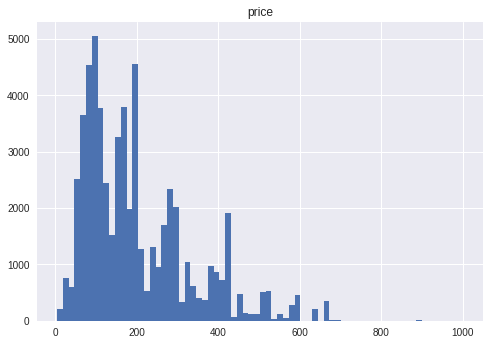

In [57]:
final_df.hist(column='price', bins=70)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5bf0c8160>]], dtype=object)

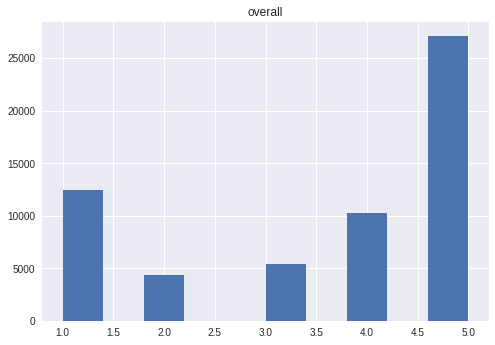

In [58]:
final_df.hist('overall')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5b1b81eb8>]], dtype=object)

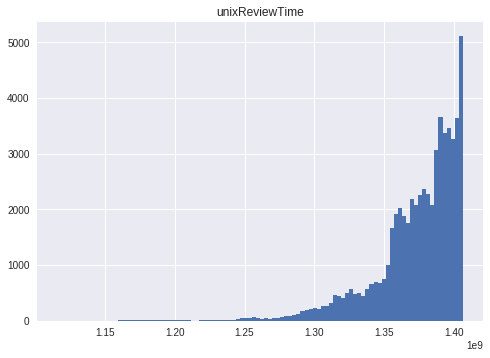

In [59]:
final_df.hist(column='unixReviewTime', bins=100)